# Analisi di un database Kaggle (https://www.kaggle.com/hugomathien/soccer) con dati su varie stagioni, campionati e squadre di calcio (Europa)

Il database si può scaricare da Kaggle in formato .sqlite. 
Per convertirlo in un dataframe pandas ho utilizzato la libreria sqlite3. 
Il database contiene una serie di tabelle con informazioni su squadre, partite, giocatori, etc...

Ho selezionato solo i database necessari per la mia analisi e li ho salvati in formato .csv, li ho caricati sul mio drive e li ho poi importarli sul notebook colab.

## Codice utilizzato per ottenere i dataframe necessari da formato sqlite ed esportare come csv

In [ ]:
"""
import pandas as pd
import sqlite3       # required library
import numpy as np

# Read sqlite query results into pandas DataFrame
con = sqlite3.connect("/......../database.sqlite")
df_country = pd.read_sql_query("SELECT * FROM Country", con)
df_league = pd.read_sql_query("SELECT * FROM League", con)
df_match = pd.read_sql_query("SELECT * FROM Match", con)
df_player = pd.read_sql_query("SELECT * FROM Player", con)
df_player_attr = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
df_team = pd.read_sql_query("SELECT * FROM Team", con)
df_team_attr = pd.read_sql_query("SELECT * FROM Team_Attributes", con)
con.close()

df_league.to_excel("df_league.csv")
df_team.to_excel("df_team.csv")
df_match.to_excel("df_match.csv")
"""

## Identificazione dei campionati e delle squadre oggetto di analisi

In [ ]:
import pandas as pd
import numpy as np

######## modificare link se necessario
df_league = pd.read_csv("/content/drive/MyDrive/df_league.csv", index_col=0)
df_team = pd.read_csv("/content/drive/MyDrive/df_team.csv", index_col=0)
df_match = pd.read_csv("/content/drive/MyDrive/df_match.csv", index_col=0)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
# Identifica leghe
print(df_league[['name','country_id']])

# ID per i campionati di interesse
# SERIEA = 10257
# LIGA = 21518
# PREMIER = 1729

                        name  country_id
0     Belgium Jupiler League           1
1     England Premier League        1729
2             France Ligue 1        4769
3      Germany 1. Bundesliga        7809
4              Italy Serie A       10257
5     Netherlands Eredivisie       13274
6         Poland Ekstraklasa       15722
7   Portugal Liga ZON Sagres       17642
8    Scotland Premier League       19694
9            Spain LIGA BBVA       21518
10  Switzerland Super League       24558


In [ ]:
# Check: country e league id sono la stessa cosa (significa che il database non contiene partite di competizioni internazionali tipo Champions League)
print(df_match["league_id"].unique())
print(df_match["country_id"].unique())

[    1  1729  4769  7809 10257 13274 15722 17642 19694 21518 24558]
[    1  1729  4769  7809 10257 13274 15722 17642 19694 21518 24558]


In [ ]:
# Identifica squadre
print("="*80)
print("==> DataFrame with all the teams")
print(df_team[["team_api_id", "team_long_name", "team_short_name"]].head())   # esempio del dataframe df_teams
print(f"==> There are {len(df_team)} teams in this df")
print("="*80)

# Identifica Juventus (ricerca in base al nome oppure scorrendo tutte le righe dopo filtro per lega (come fatto nella prossima cella))
print("ID for Juventus")
print(df_team[df_team["team_long_name"]=="Juventus"])   # team_api_id=9885, team_short_name=JUV
print("="*80)

# Altre squadre indentificate (non riporto il codice, sempre uguale)
# MUN = 10260 (Man United, vincente in 10/11, 12/13)
# MCI = 8456  (man City, vincente in 11/12, 13/14)
# CHE = 8455  (Chelsea, vincente in 14/15)
# REA = 8633  (Real Madrid, vincente in 11/12)
# AMA = 9906  (Atletico Madrid, vincente in 13/14)

==> DataFrame with all the teams
   team_api_id     team_long_name team_short_name
0         9987           KRC Genk             GEN
1         9993       Beerschot AC             BAC
2        10000   SV Zulte-Waregem             ZUL
3         9994   Sporting Lokeren             LOK
4         9984  KSV Cercle Brugge             CEB
==> There are 299 teams in this df
ID for Juventus
        id  team_api_id  team_fifa_api_id team_long_name team_short_name
133  20522         9885              45.0       Juventus             JUV


In [ ]:
# Identifica tutte squadre SerieA
sAid = list(df_match[(df_match['country_id']==10257)]["home_team_api_id"].unique())
Premid = list(df_match[(df_match['country_id']==1729)]["home_team_api_id"].unique())
Ligaid = list(df_match[(df_match['country_id']==21518)]["home_team_api_id"].unique())

sA = df_team[df_team["team_api_id"].isin(sAid)]
Prem = df_team[df_team["team_api_id"].isin(Premid)]
Liga = df_team[df_team["team_api_id"].isin(Ligaid)]

# Ordine uguale tra id e nomi (per funzione più avanti)
sA_id = list(sA["team_api_id"])
sA_names = list(sA["team_long_name"])
Prem_id = list(Prem["team_api_id"])
Prem_names = list(Prem["team_long_name"])
Liga_id = list(Liga["team_api_id"])
Liga_names = list(Liga["team_long_name"])

# Esempio di dizionario
# Ci sono più di 20 squadre perchè alcune sono retrocesse e altre promosse dalla B nel corso degli anni
dict_sA = dict(zip(sA_id, sA_names))
dict_sA

{6269: 'Novara',
 7943: 'Sassuolo',
 8524: 'Atalanta',
 8529: 'Cagliari',
 8530: 'Catania',
 8533: 'Chievo Verona',
 8534: 'Empoli',
 8535: 'Fiorentina',
 8537: 'Livorno',
 8540: 'Palermo',
 8543: 'Lazio',
 8551: 'Siena',
 8564: 'Milan',
 8600: 'Udinese',
 8636: 'Inter',
 8686: 'Roma',
 8690: 'Reggio Calabria',
 9804: 'Torino',
 9857: 'Bologna',
 9858: 'Brescia',
 9875: 'Napoli',
 9876: 'Hellas Verona',
 9878: 'Pescara',
 9880: 'Cesena',
 9882: 'Sampdoria',
 9885: 'Juventus',
 9888: 'Lecce',
 9891: 'Frosinone',
 9976: 'Bari',
 10167: 'Parma',
 10233: 'Genoa',
 208931: 'Carpi'}

In [ ]:
# ANALISI PRELIMINARE DEL DATAFRAME df_match
df_match.head()

# Season è la stagione (es 2008/2009)
# Stage è la giornata di campionato data la stagione

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
# Tutte le colonne
pd.options.display.max_seq_items = 2000
print(str(df_match.columns))

# Nelle analisi successive utilizzerò solo le prime 10 colonne
# Le altre sono relative a giocatori, eventi della partita e quote di siti scommesse, non rientrano nella mia analisi

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [ ]:
# SELEZIONO TUTTE LE PARTITE DI SERIE A GIOCATE DALLA JUVENTUS

# Dal dataframe con tutti i match seleziono solo Serie A (country_id) 
# e tutte le partite in cui la squadra di casa o la squadra in trasferta è Juventus 
# (utilizzando il team_api_id perchè non c'è il nome vero della squadra nel df_match)
dfJUV = df_match[(df_match['country_id']==10257) & (df_match["home_team_api_id"]==9885) | (df_match["away_team_api_id"]==9885)] 
# Mantengo info solo su stagione, giornata, squadre e goal segnati
dfJUV = dfJUV[['season', 'stage', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]


# Si potrebbero creare nuove colonne con i veri nomi delle squadre, ma ai fini dell'analisi non cambia nulla

# Ultimo filtro per analisi successiva: seleziono solo stagioni in cui Juve ha vinto il campionato
dfJUV = dfJUV[dfJUV["season"].isin(["2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])]
dfJUV.head()

,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
11405,2011/2012,1,8600,9885,0,0
11410,2011/2012,10,8636,9885,1,2
11422,2011/2012,11,9875,9885,3,3
11431,2011/2012,12,9885,8540,3,0
11439,2011/2012,13,8543,9885,0,1


In [ ]:
# Definisco una funzione per creare in automatico il dataframe per singola squadra visto in precedenza
def create_team_df(country_id, team_api, seasons):
    """
    Seasons = lista di stagioni da selezionare
    """

    df = df_match[(df_match['country_id']==country_id) & (df_match["home_team_api_id"]==team_api) | (df_match["away_team_api_id"]==team_api)]
    df = df[['season', 'stage', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]
    df = df[df["season"].isin(seasons)]
    
    # Aggiungo colonne con goal segnati e subiti per ogni partita, più esito della partita relativo alla mia squadra
    # I loop si possono evitare (metodo più semplice dopo), lascio come esempio
    
    df["differenza_reti"] = (df["home_team_goal"] - df["away_team_goal"])   # se >0 significa che la squdra di casa ha vinto, etc....
    goalfatti = []    
    goalsubiti = []
    vittorie = np.zeros(len(df), dtype=int)
    sconfitte = np.zeros(len(df), dtype=int)
    pari =  np.zeros(len(df), dtype=int)  

    for i in range(len(df)): 
        if df["home_team_api_id"].iloc[i] != team_api:  # La nostra squadra di interesse è quella in TRASFERTA
            goalfatti.append(df["away_team_goal"].iloc[i])
            goalsubiti.append(df["home_team_goal"].iloc[i])
            if df["differenza_reti"].iloc[i] > 0:       # vinto squadra casa
              sconfitte[i] = 1
            elif df["differenza_reti"].iloc[i] == 0:    # pareggio
              pari[i] = 1 
            else:
              vittorie[i] = 1
        else:                                           # La nostra squadra di interesse è quella in CASA
            goalfatti.append(df["home_team_goal"].iloc[i])
            goalsubiti.append(df["away_team_goal"].iloc[i])
            if df["differenza_reti"].iloc[i] > 0: 
              vittorie[i] = 1
            elif df["differenza_reti"].iloc[i] == 0:
              pari[i] = 1 
            else:
              sconfitte[i] = 1
    df["GoalFatti"] = goalfatti
    df["GoalSubiti"] = goalsubiti
    df["Vittorie"] = vittorie
    df["Sconfitte"] = sconfitte
    df["Pareggi"] = pari
    return df

In [ ]:
# Creo per tutte le squadre di prima
dfJUV = create_team_df(10257, 9885, ["2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])
dfMUN = create_team_df(1729, 10260, ["2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])
dfMCI = create_team_df(1729, 8456, ["2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])
dfCHE = create_team_df(1729, 8455, ["2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])
dfREA = create_team_df(21518, 8633, ["2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])
dfAMA = create_team_df(21518, 9906, ["2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])

dfJUV.head()

,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,differenza_reti,GoalFatti,GoalSubiti,Vittorie,Sconfitte,Pareggi
11017,2010/2011,1,9976,9885,1,0,1,0,1,0,1,0
11031,2010/2011,10,9885,9880,3,1,2,3,1,1,0,0
11045,2010/2011,11,9858,9885,1,1,0,1,1,0,0,1
11048,2010/2011,12,9885,8686,1,1,0,1,1,0,0,1
11056,2010/2011,13,10233,9885,0,2,-2,2,0,1,0,0


## Qualche statistica per alcune top squadre di Premier, LaLiga e Serie A

In [ ]:
# Utilizzo i dataframe creati in precedenza
# Definisco una funzione che calcola una serie di statistiche per la squadra oggetto di analisi

def summary_stat(df):
    """
    Input è il dataframe creato con la funzione 'create_team_df' per la specifica squadra
    """

    summ = df[["season", "GoalFatti", "GoalSubiti", "Vittorie", "Sconfitte", "Pareggi"]].groupby("season").sum()
    summ["DifferenzaReti"] = summ["GoalFatti"] - summ["GoalSubiti"]
    
    return summ

print("============================== JUVENTUS ========================================")
print(summary_stat(dfJUV))   # Statistiche corrette, check su dati disponibili online
print("="*80)
print("============================== MANCHESTER UNITED ===============================")
print(summary_stat(dfMUN))
print("="*80)
print("============================== MANCHESTER CITY =================================")
print(summary_stat(dfMCI))
print("="*80)

============================== JUVENTUS ========================================
           GoalFatti  GoalSubiti  Vittorie  Sconfitte  Pareggi  DifferenzaReti
season                                                                        
2010/2011         57          47        15         10       13              10
2011/2012         64          19        22          0       13              45
2012/2013         71          24        27          5        6              47
2013/2014         80          23        33          2        3              57
2014/2015         72          24        26          3        9              48
2015/2016         75          20        29          5        4              55
============================== MANCHESTER UNITED ===============================
           GoalFatti  GoalSubiti  Vittorie  Sconfitte  Pareggi  DifferenzaReti
season                                                                        
2010/2011         78          37        23      

## Analisi su goal fatti. Utilizzo il dataframe df_match (tutte le partite per vari campionati europei)

Obiettivo è quello ottenere una overview sui goal segnati in una partita di calcio.

In [ ]:
pd.options.mode.chained_assignment = None  # Silenzio warning nell'output (da quello che ho capito leggendo i doc e comparando con metodo in cui uso np.where() il modo in cui utilizzo non è un errore)

# 1) Seleziono solo info sui goal
df_goaltot = df_match[['country_id', 'home_team_goal', 'away_team_goal']]
# Aggiungo colonna per goal totali nella partita
df_goaltot["total_goal"] = df_goaltot["home_team_goal"] + df_goaltot["away_team_goal"]
df_goaltot.head()

,country_id,home_team_goal,away_team_goal,total_goal
0,1,1,1,2
1,1,0,0,0
2,1,0,3,3
3,1,5,0,5
4,1,1,3,4


In [ ]:
# 2) Statistiche descrittive
df_goaltot[["home_team_goal",	"away_team_goal",	"total_goal"]].describe() 

# Notiamo come la squadra in casa tenda a segnare più goal in media in una partita
# La media di goal a partita per tutte le partite di tutti i campionati in questo df è intorno ai 2.7 goal, con un massimo di 12

,home_team_goal,away_team_goal,total_goal
count,25979.000000,25979.000000,25979.000000
mean,1.544594,1.160938,2.705531
std,1.297158,1.142110,1.672456
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000
50%,1.000000,1.000000,3.000000
75%,2.000000,2.000000,4.000000
max,10.000000,9.000000,12.000000


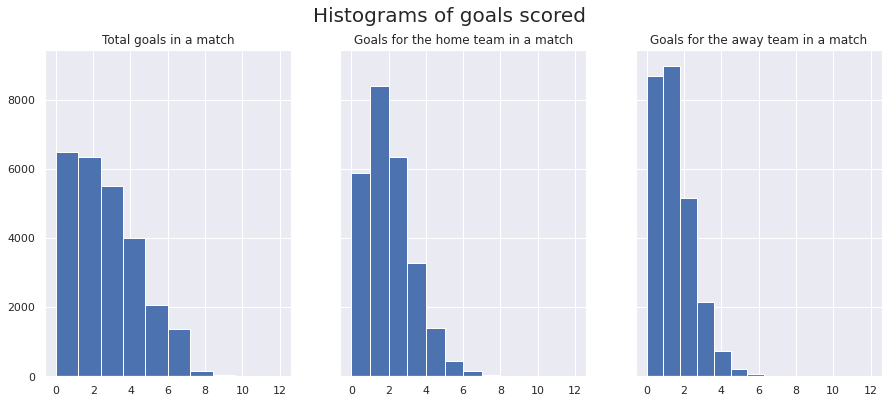

In [ ]:
# 3) Grafici
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,6))
fig.suptitle('Histograms of goals scored', fontsize=20)
ax1.hist(df_goaltot["total_goal"], 10)
ax1.set_title("Total goals in a match")
ax2.hist(df_goaltot["home_team_goal"], 10)
ax2.set_title("Goals for the home team in a match")
ax3.hist(df_goaltot["away_team_goal"], 10)
ax3.set_title("Goals for the away team in a match");

In [ ]:
# 4) Analisi in base al campionato 
byleague = df_goaltot.groupby("country_id").mean()
byleague.set_index(df_league['name'], inplace=True)   # .set_index() cambia index del groupby object per identificare i campionati
byleague

,home_team_goal,away_team_goal,total_goal
name,,,
Belgium Jupiler League,1.609375,1.192130,2.801505
England Premier League,1.550987,1.159539,2.710526
France Ligue 1,1.402961,1.040132,2.443092
Germany 1. Bundesliga,1.626634,1.274918,2.901552
Italy Serie A,1.500829,1.116009,2.616838
Netherlands Eredivisie,1.779820,1.301062,3.080882
Poland Ekstraklasa,1.394792,1.030208,2.425000
Portugal Liga ZON Sagres,1.408382,1.126218,2.534600
Scotland Premier League,1.429276,1.204496,2.633772


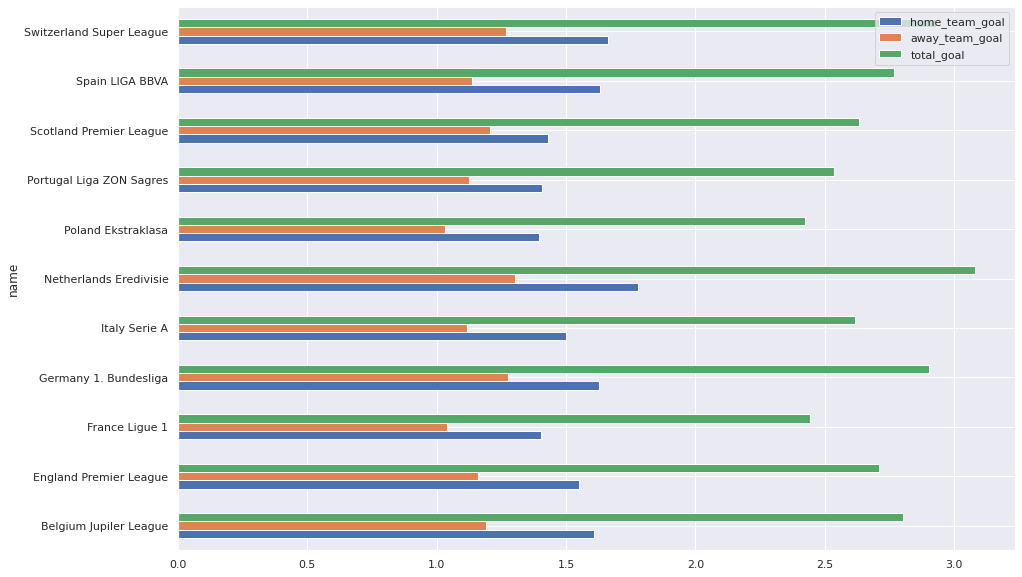

In [ ]:
plt.rcParams["figure.figsize"] = (15, 10)
byleague.plot.barh();

# Vediamo per esempio come il campionato belga sia l'unico dove in media si segnano più di 3 goal a partita

In [ ]:
# Altre statistiche
df_goaltot.groupby("country_id").max().set_index(df_league['name'])

,home_team_goal,away_team_goal,total_goal
name,,,
Belgium Jupiler League,7,7,9
England Premier League,9,6,10
France Ligue 1,6,9,10
Germany 1. Bundesliga,9,8,11
Italy Serie A,7,7,9
Netherlands Eredivisie,10,6,10
Poland Ekstraklasa,6,6,8
Portugal Liga ZON Sagres,8,6,9
Scotland Premier League,9,6,12


In [ ]:
df_goaltot.groupby("country_id").var().set_index(df_league['name'])

,home_team_goal,away_team_goal,total_goal
name,,,
Belgium Jupiler League,1.673033,1.265902,2.744016
England Premier League,1.720335,1.310176,2.859909
France Ligue 1,1.370639,1.123101,2.408080
Germany 1. Bundesliga,1.794337,1.440940,2.906937
Italy Serie A,1.492788,1.162930,2.690671
Netherlands Eredivisie,1.974795,1.538667,3.029826
Poland Ekstraklasa,1.400077,1.094449,2.372694
Portugal Liga ZON Sagres,1.503547,1.335109,2.680909
Scotland Premier League,1.676839,1.325685,2.703982


## Defense wins championships? Analisi sui goal subiti dalle vincenti di Serie A, Premier League e LaLiga

In [ ]:
# Calcolo dei goal subiti da ogni squadra in ogni stagione, 
# Vediamo se la squadra vincente era una di quelle con meno goal subiti o quella con meno in assoluto

# utilizzo le liste sA_id, Prem_id, Liga_id (e stesse per nomi) definite in una delle prime celle

# Loop su tutte le squadre per ogni lega, per ognuna ottengo il totale goal subiti in base alla stagione

def goal_subiti(country_id, team_api_list, team_name_list, seasons):
    """
    country_id: int, id del campionato
    team_api_list: list, lista di api_id per tutte le squadre del campionato
    team_name_list: list, lista di stringhe con nomi per tutte le squadre del campionato
    seasons: list, lista di stagioni del campionato da analizzare
    """
    # Creo df per raccogliere le info
    df_goalsubiti_perstagione = pd.DataFrame(index=seasons)   # indice sono le stagioni passate nella funzione

    # Loop su id e nome
    for team_api, name in zip(team_api_list, team_name_list):
        # solo partite di quel team, per ogni data stagioni
        df = df_match[(df_match['country_id']==country_id) & (df_match["home_team_api_id"]==team_api) | (df_match["away_team_api_id"]==team_api)]
        df = df[['season', 'stage', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]
        df = df[df["season"].isin(seasons)]

        # Aggiungo colonna con goal subiti per ogni partita   
        ############################ 
        # Metodo più semplice e veloce, lascio anche quello prima solo come esempio
        df["GoalSubiti"] = np.where(df["home_team_api_id"] != team_api, df["home_team_goal"], df["away_team_goal"])
        ############################

        calcolo_goalsubiti = df[["season", "GoalSubiti"]].groupby("season").sum()   # somma dei goal subiti in ogni stagione
        df_goalsubiti_perstagione[f"{name}"] = calcolo_goalsubiti["GoalSubiti"]     # aggiungo colonna al df iniziale
      
    return df_goalsubiti_perstagione


In [ ]:
# SERIEA = 10257
gs_sA = goal_subiti(10257, sA_id, sA_names, ["2008/2009", "2009/2010", "2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])
gs_sA   
# ok rispetto a calcoli di prima per JUV

,Atalanta,Siena,Cagliari,Lazio,Catania,Genoa,Chievo Verona,Reggio Calabria,Fiorentina,Juventus,Milan,Bologna,Roma,Napoli,Sampdoria,Inter,Torino,Lecce,Udinese,Palermo,Bari,Livorno,Parma,Cesena,Brescia,Novara,Pescara,Hellas Verona,Sassuolo,Empoli,Frosinone,Carpi
2008/2009,48.0,44.0,50.0,55,51.0,39,49,62.0,38,37,35,62.0,61,45,52.0,32,61.0,67.0,50,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009/2010,53.0,67.0,58.0,43,45.0,61,42,NaN,47,56,39,55.0,41,43,41.0,34,NaN,NaN,59,47.0,49.0,61.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010/2011,NaN,NaN,51.0,39,52.0,47,40,NaN,44,47,24,52.0,52,39,49.0,42,NaN,66.0,43,63.0,56.0,NaN,47.0,50.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011/2012,40.0,45.0,43.0,43,48.0,67,44,NaN,38,19,33,41.0,52,41,NaN,53,NaN,52.0,34,62.0,NaN,NaN,50.0,56.0,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN
2012/2013,56.0,57.0,55.0,42,46.0,52,52,NaN,44,24,39,52.0,56,36,51.0,57,55.0,NaN,45,54.0,NaN,NaN,46.0,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN
2013/2014,51.0,NaN,53.0,54,66.0,50,54,NaN,44,23,49,58.0,25,39,62.0,39,48.0,NaN,57,NaN,NaN,77.0,46.0,NaN,NaN,NaN,NaN,68.0,72.0,NaN,NaN,NaN
2014/2015,57.0,NaN,68.0,36,NaN,47,41,NaN,46,24,50,NaN,31,50,42.0,48,45.0,NaN,56,55.0,NaN,NaN,75.0,73.0,NaN,NaN,NaN,65.0,57.0,52.0,NaN,NaN
2015/2016,47.0,NaN,NaN,52,NaN,48,45,NaN,42,20,43,45.0,41,32,61.0,38,55.0,NaN,60,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,40.0,49.0,76.0,57.0


In [ ]:
# Minor numero di goal subiti per stagione
mingoal = pd.DataFrame(gs_sA.min(axis=1), columns=["Minor numero di goal subiti"])

# aggiungo goal subiti dalle vincenti del campionato nelle date stagioni per comparare
mingoal["Juve"] = gs_sA["Juventus"]
mingoal["Milan"] = gs_sA["Milan"]
mingoal["Inter"] = gs_sA["Inter"]

mingoal
# Tra 2008 e 2016 in Serie A la squadra che ha vinto il campionato è sempre stata quella col minor numero di goal segnati 
# Inter 08/09, 09/10, Milan 10/11, Juve negli altri casi  
# (tot 8 su 8)

,Minor numero di goal subiti,Juve,Milan,Inter
2008/2009,32.0,37,35,32
2009/2010,34.0,56,39,34
2010/2011,24.0,47,24,42
2011/2012,19.0,19,33,53
2012/2013,24.0,24,39,57
2013/2014,23.0,23,49,39
2014/2015,24.0,24,50,48
2015/2016,20.0,20,43,38


In [ ]:
# PREMIER = 1729
gs_prem = goal_subiti(1729, Prem_id, Prem_names, ["2008/2009", "2009/2010", "2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])

mingoalP = pd.DataFrame(gs_prem.min(axis=1), columns=["Minor numero di goal subiti"])
mingoalP["Manchester United"] = gs_prem["Manchester United"]
mingoalP["Manchester City"] = gs_prem["Manchester City"]
mingoalP["Chelsea"] = gs_prem["Chelsea"]
mingoalP["Leicester City"] = gs_prem["Leicester City"]

mingoalP
# Man United vincente in 08/09, 10/11, 12/13, man City vincente in 11/12, 13/14, Chelsea vincente in 09/10, 14/15, Leicester in 15/16
# In premier invece solo in 2 anni la squadra vincente era quella con meno goal subiti (United 08/09, Chelsea 14/15), 
# Leicester molto vicino (+1) in 15/16    (tot 2-3 su 8)

,Minor numero di goal subiti,Manchester United,Manchester City,Chelsea,Leicester City
2008/2009,24.0,24,50,24,NaN
2009/2010,28.0,28,45,32,NaN
2010/2011,33.0,37,33,33,NaN
2011/2012,29.0,33,29,46,NaN
2012/2013,34.0,43,34,39,NaN
2013/2014,27.0,43,37,27,NaN
2014/2015,32.0,37,38,32,55.0
2015/2016,35.0,35,41,53,36.0


In [ ]:
# LIGA = 21518
gs_Liga = goal_subiti(21518, Liga_id, Liga_names, ["2008/2009", "2009/2010", "2010/2011", "2011/2012", "2012/2013", "2013/2014", "2014/2015", "2015/2016"])
gs_Liga

mingoalL = pd.DataFrame(gs_Liga.min(axis=1), columns=["Minor numero di goal subiti"])
mingoalL["FC Barcelona"] = gs_Liga["FC Barcelona"]
mingoalL["Atlético Madrid"] = gs_Liga["Atlético Madrid"]
mingoalL["Real Madrid CF"] = gs_Liga["Real Madrid CF"]

mingoalL
# Real Madrid vincente in 11/12, Atletico Madrid vincente in 13/14, Barca negli altri anni
# La vincente è quella con meno goal subiti nel 08/09, 09/10, 10/11 e 14/15 (barca), 13/14 (atletico)  (tot 5 su 8)

,Minor numero di goal subiti,FC Barcelona,Atlético Madrid,Real Madrid CF
2008/2009,35.0,35,57,52
2009/2010,24.0,24,61,35
2010/2011,21.0,21,53,33
2011/2012,29.0,29,46,32
2012/2013,31.0,40,31,42
2013/2014,26.0,33,26,38
2014/2015,21.0,21,29,38
2015/2016,18.0,29,18,34
